In [1]:
from torch.autograd import Variable

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
import VAE_NN
from torchvision import datasets, transforms

In [4]:
from torch.optim import Adam

In [5]:
test = VAE_NN.VAE_Net()

In [6]:
test.cuda()

VAE_Net(
  (ei): Linear(in_features=784, out_features=500)
  (em): Linear(in_features=500, out_features=20)
  (ev): Linear(in_features=500, out_features=20)
  (di): Linear(in_features=20, out_features=500)
  (do): Linear(in_features=500, out_features=784)
)

In [7]:
optimizer = Adam(test.parameters(),lr=1e-3)

In [8]:
train_data,_ = VAE_NN.get_data_loaders(b_size=128)

In [11]:
import time

In [27]:
t = time.time()
VAE_NN.train(test,optimizer,train_data, VAE_NN.elbo_loss, epochs = 100)
t_e = time.time() - t
print('Seconds for 100 epcohs: %d' % t_e)

Seconds for 100 epcohs: 662


In [28]:
t_data,_ = next(iter(train_data))

In [29]:
t_data = Variable(t_data).view(-1,784)

In [46]:
i = 10

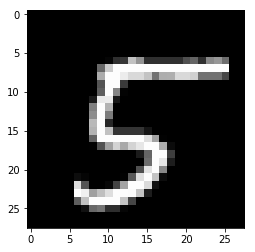

In [47]:
plt.imshow(np.reshape(t_data[i].data.cpu().numpy(),(28,28)), cmap='gray')
plt.show()

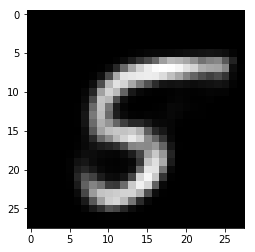

In [48]:
a,b,c = test(t_data[i].cuda())

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray')
plt.show()

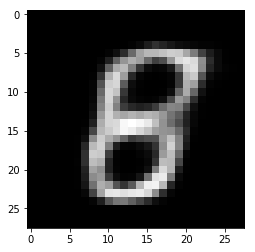

In [50]:
a = test.sample()

a = test.decode(a)

im_t = a

im_t = im_t.data.cpu().numpy()

plt.imshow(np.reshape(im_t,(28,28)),cmap='gray')
plt.show()